In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import signal

In [42]:
num1 = [10]
den1 = [1,2]

num2 = [4]
den2 = [2,0,1]

num3 = [1,4]
den3 = [2,0,1]

num4 = [-2,6]
den4 = [1,7,16,12]

In [49]:
G1 = signal.TransferFunction(num1, den1)
G2 = signal.TransferFunction(num2, den2)
G3 = signal.TransferFunction(num3, den3)
G4 = signal.TransferFunction(num4, den4)
G = [G1, G2, G3, G4]

In [85]:
for i in range(len(G)):
    print("Transmitancja", i+1,": ", G[i], "\n")

Transmitancja 1 :  TransferFunctionContinuous(
array([10.]),
array([1., 2.]),
dt: None
) 

Transmitancja 2 :  TransferFunctionContinuous(
array([2.]),
array([1. , 0. , 0.5]),
dt: None
) 

Transmitancja 3 :  TransferFunctionContinuous(
array([0.5, 2. ]),
array([1. , 0. , 0.5]),
dt: None
) 

Transmitancja 4 :  TransferFunctionContinuous(
array([-2.,  6.]),
array([ 1.,  7., 16., 12.]),
dt: None
) 



In [83]:
A1 = np.array([[-2]])
B1 = np.array([[1]])
C1 = np.array([[10]])
D1 = np.array([[0]])
Gm1 = signal.StateSpace(A1,B1,C1,D1)

A2 = np.array([[0, 1],[-1/2, 0]])
B2 = np.array([[0],[1]])
C2 = np.array([[2, 0]])
D2 = np.array([[0]])
Gm2 = signal.StateSpace(A2,B2,C2,D2)

A3 = np.array([[0, 1],[-1/2, 0]])
B3 = np.array([[0], [1]])
C3 = np.array([[2, 1/2]])
D3 = np.array([[0]])
Gm3 = signal.StateSpace(A3,B3,C3,D3)

A4 = np.array([[0,1,0],[0,0,1],[-12,-16,-7]])
B4 = np.array([[0],[0],[1]])
C4 = np.array([[6,-2,0]])
D4 = np.array([[0]])
Gm4 = signal.StateSpace(A4,B4,C4,D4)

Gm = [Gm1,Gm2,Gm3,Gm4]
for i in range(len(Gm)):
    print("G(obliczone)", i+1,": \n", Gm[i], "\n")

G(obliczone) 1 : 
 StateSpaceContinuous(
array([[-2]]),
array([[1]]),
array([[10]]),
array([[0]]),
dt: None
) 

G(obliczone) 2 : 
 StateSpaceContinuous(
array([[ 0. ,  1. ],
       [-0.5,  0. ]]),
array([[0],
       [1]]),
array([[2, 0]]),
array([[0]]),
dt: None
) 

G(obliczone) 3 : 
 StateSpaceContinuous(
array([[ 0. ,  1. ],
       [-0.5,  0. ]]),
array([[0],
       [1]]),
array([[2. , 0.5]]),
array([[0]]),
dt: None
) 

G(obliczone) 4 : 
 StateSpaceContinuous(
array([[  0,   1,   0],
       [  0,   0,   1],
       [-12, -16,  -7]]),
array([[0],
       [0],
       [1]]),
array([[ 6, -2,  0]]),
array([[0]]),
dt: None
) 



In [81]:
Gss1 = signal.tf2ss(num1, den1)
Gss2 = signal.tf2ss(num2, den2)
Gss3 = signal.tf2ss(num3, den3)
Gss4 = signal.tf2ss(num4, den4)

Gss = [Gss1,Gss2,Gss3,Gss4]
for i in range(len(Gss)):
    print("Gss", i+1,": ", Gss[i], "\n")

Gss 1 :  (array([[-2.]]), array([[1.]]), array([[10.]]), array([[0.]])) 

Gss 2 :  (array([[-0. , -0.5],
       [ 1. ,  0. ]]), array([[1.],
       [0.]]), array([[0., 2.]]), array([[0.]])) 

Gss 3 :  (array([[-0. , -0.5],
       [ 1. ,  0. ]]), array([[1.],
       [0.]]), array([[0.5, 2. ]]), array([[0.]])) 

Gss 4 :  (array([[ -7., -16., -12.],
       [  1.,   0.,   0.],
       [  0.,   1.,   0.]]), array([[1.],
       [0.],
       [0.]]), array([[ 0., -2.,  6.]]), array([[0.]])) 



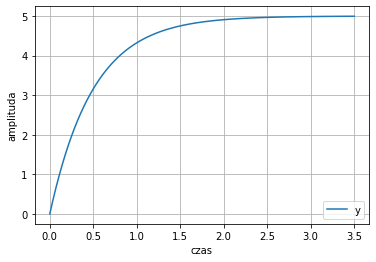

In [136]:
out1 = signal.step2(G1)
plt.plot(out1[0], out1[1], label='y')
plt.xlabel('czas')
plt.ylabel('amplituda')
plt. legend(loc=4)
plt.grid()

plt.savefig("1out.pdf", format='pdf')

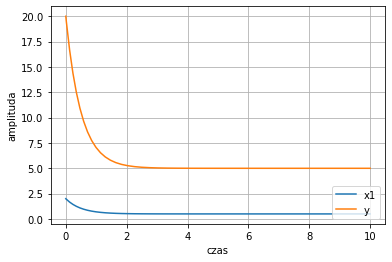

In [140]:
A = np.array([[-2.]])

B = np.array([[1.]])

C = np.array([[10.]])

             
def force(t):
    return np.array([[1]])  # return as an array with single element


def deg1(t, x):
    x = np.array([x]).T  # for compatibility with a solver, convert x to matrix and get transpose

    y = A @ x + B @ force(t) # calculate state equation
    # note: matrix multiplication is done using @ operator

    return np.ndarray.tolist(y.T[0])  # for compatibility with a solver, transpose x and convert into list



# simulate the dynamic system, pass a system deg1, time of simulation and initial conditions
res = solve_ivp(deg1, [0, 10], [2], rtol=1e-10)  # arguments rtol and atol sets calculation tolerance


# calculate output based on the obtained state
y = C @ np.array(res.y);
y = np.ndarray.tolist(y[0].T);


# plot results
plt.plot(res.t, res.y[0], label='x1')
plt.plot(res.t, y, label='y')
plt.legend(loc=4)
plt.xlabel('czas')
plt.ylabel('amplituda')
plt.grid()
plt.savefig("1init.pdf", format = 'pdf')


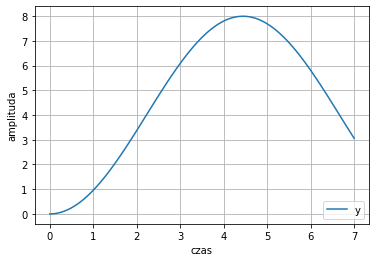

In [154]:
out1 = signal.step2(G2)
plt.plot(out1[0], out1[1], label='y')
plt.xlabel('czas')
plt.ylabel('amplituda')
plt. legend(loc=4)
plt.grid()

plt.savefig("2out.pdf", format='pdf')

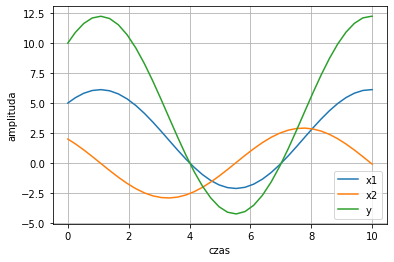

In [142]:
A = np.array([[ 0. ,  1. ], [-0.5,  0. ]])
B = np.array([[0], [1]])
C = np.array([[2, 0]])

             
def force(t):
    return np.array([[1]])  # return as an array with single element


def deg1(t, x):
    x = np.array([x]).T  # for compatibility with a solver, convert x to matrix and get transpose

    y = A @ x + B @ force(t);  # calculate state equation
    # note: matrix multiplication is done using @ operator

    return np.ndarray.tolist(y.T[0])  # for compatibility with a solver, transpose x and convert into list


# simulate the dynamic system, pass a system deg1, time of simulation and initial conditions
res = solve_ivp(deg1, [0, 10], [5,2], rtol=1e-10)  # arguments rtol and atol sets calculation tolerance

# calculate output based on the obtained state
y = C @ np.array(res.y);
y = np.ndarray.tolist(y[0].T);

# plot results
plt.plot(res.t, res.y[0], label='x1')
plt.plot(res.t, res.y[1], label='x2')
plt.plot(res.t, y, label="y")
plt.legend(loc=4)
plt.xlabel('czas')
plt.ylabel('amplituda')
plt.grid()
plt.savefig("2init.pdf", format = 'pdf')


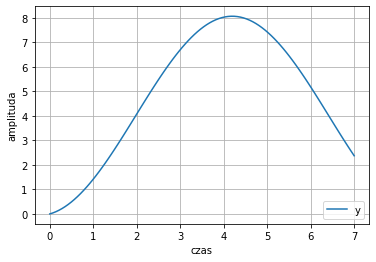

In [134]:
out1 = signal.step2(G3)
plt.plot(out1[0], out1[1], label='y')
plt.xlabel('czas')
plt.ylabel('amplituda')
plt. legend(loc=4)
plt.grid()

plt.savefig("3out.pdf", format='pdf')

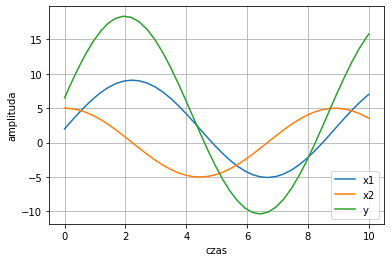

In [143]:
A = np.array([[ 0. ,  1. ],
       [-0.5,  0. ]])
B = np.array([[0],
       [1]])
C = np.array([[2. , 0.5]])

             
def force(t):
    return np.array([[1]])  # return as an array with single element


def deg1(t, x):
    x = np.array([x]).T  # for compatibility with a solver, convert x to matrix and get transpose

    y = A @ x + B @ force(t);  # calculate state equation
    # note: matrix multiplication is done using @ operator

    return np.ndarray.tolist(y.T[0])  # for compatibility with a solver, transpose x and convert into list


# simulate the dynamic system, pass a system deg1, time of simulation and initial conditions
res = solve_ivp(deg1, [0, 10], [2,5], rtol=1e-10)  # arguments rtol and atol sets calculation tolerance

# calculate output based on the obtained state
y = C @ np.array(res.y);
y = np.ndarray.tolist(y[0].T);

# plot results
plt.plot(res.t, res.y[0], label='x1')
plt.plot(res.t, res.y[1], label='x2')
plt.plot(res.t, y, label="y")
plt.legend(loc=4)
plt.xlabel('czas')
plt.ylabel('amplituda')
plt.grid()
plt.savefig("3init.pdf", format = 'pdf')


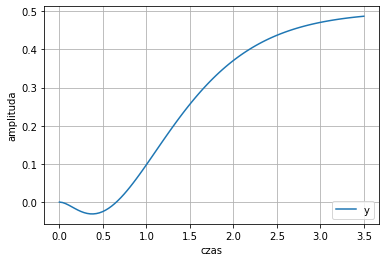

In [133]:
out1 = signal.step2(G4)
plt.plot(out1[0], out1[1], label='y')
plt.xlabel('czas')
plt.ylabel('amplituda')
plt. legend(loc=4)
plt.grid()
plt.savefig("4out.pdf", format='pdf')

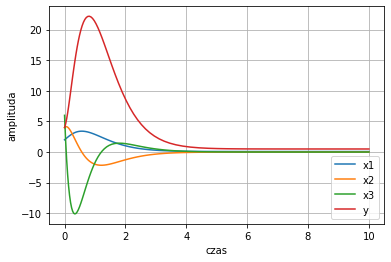

In [146]:
A = np.array([[  0,   1,   0],
       [  0,   0,   1],
       [-12, -16,  -7]])
B = np.array([[0],
       [0],
       [1]])
C = np.array([[ 6, -2,  0]])

             
def force(t):
    return np.array([[1]])  # return as an array with single element


def deg1(t, x):
    x = np.array([x]).T  # for compatibility with a solver, convert x to matrix and get transpose

    y = A @ x + B @ force(t);  # calculate state equation
    # note: matrix multiplication is done using @ operator

    return np.ndarray.tolist(y.T[0])  # for compatibility with a solver, transpose x and convert into list


# simulate the dynamic system, pass a system deg1, time of simulation and initial conditions
res = solve_ivp(deg1, [0, 10], [2,4,6], rtol=1e-10)  # arguments rtol and atol sets calculation tolerance

# calculate output based on the obtained state
y = C @ np.array(res.y);
y = np.ndarray.tolist(y[0].T);

# plot results
plt.plot(res.t, res.y[0], label='x1')
plt.plot(res.t, res.y[1], label='x2')
plt.plot(res.t, res.y[2], label='x3')
plt.plot(res.t, y, label="y")
plt.legend(loc=4)
plt.xlabel('czas')
plt.ylabel('amplituda')
plt.grid()

plt.savefig("4init.pdf", format = 'pdf')


In [166]:
A21 = np.array([[-4,-1],[-2,-1]])
B21 = np.array([[2],[1]])
C21 = np.array([[3, -4]])
D21 = np.array([[1]])

signal.ss2tf(A21, B21, C21, D21)

(array([[1, 7, 4]]), array([1., 5., 2.]))

In [149]:
A22 = np.array([[-1,0,1],[-6,-3,5],[-5,-2,4]])
B22 = np.array([[0],[1],[1]])
C22 = np.array([[1,1,1]])
D22 = np.array([[0]])

signal.ss2tf(A22,B22,C22,D22)

(array([[0, 2, 5, 2]]),
 array([ 1.00000000e+00, -7.21644966e-16,  2.00000000e+00,  1.00000000e+00]))

In [150]:
A23 = np.array([[-3,1.25,-0.75,-2.75],[-6,3,-3.5,-6],[0,-1,0,1],[-6,5,-4.5,-6]])
B23 = np.array([[1/2],[1],[0],[1]])
C23 = np.array([[2,0,0,0]])
D23 = np.array([[0]])

signal.ss2tf(A23,B23,C23,D23)

(array([[0.0000000e+00, 1.0000000e+00, 1.0658141e-14, 2.0000000e+00,
         4.0000000e+00]]),
 array([ 1.,  6., 13., 16., 12.]))